# The eNMR module's users guide
## What is the eNMR module
- the eNMR module is intended to simplify the evaluation and presentation of electrophoretic NMR measurements performed on bruker spectrometers
- at the moment, it is optimized for a certain experimental setup but can be easily adapted to

## What do I need?
- anaconda with python 3.x
- additional modules: lmfit, nmrglue, jupyter(recommended)
- eNMR data
- a latex distribution
- a little bit of practice

## Where do I get help?
- simply write to nairolf.schmidt@gmail.com or f_schm52@wwu.de

## Hints
- press Shift+Tab to view the Docstrings(short info) on the respective functions. You will find options for saving/tweaking graphs or processing and infos on required arguments

# imports
- import sys and sys.path.append() is used to import the modules from the packagefolder
    - this is a workaround atm since the package has not been installed.
- latex is mandatory atm

In [1]:
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
# plt.rcParams['text.latex.unicode'] = True
# plt.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}, \renewcommand{\textrm}{\textsf}, \usepackage{amsmath}'
# plt.rc('font', family='sans-serif')
from eNMR import eNMR_Measurement, MOSY
from Phasefitting import *

# create Measurement 'm' and import data
- the eNMR.Measurement class is the starting point of every eNMR program by creating a Measurement-object from the provided path
    - here, the data import and conversion takes place. Most parameters are catched automatically but can be redefined lateron
    - the Measurement class includes analytical tools e.g. the phase analysis via automatic 0-order phase correction by entropy minimization.
        - **eNMR.Measurement** is designed for measurements on "Emma" where U is incremented via the vc-list
        - **eNMR.Pavel** is for the newer setup on "Lukas"
- m.proc() is a method which processes the FID by removing digital filters, zerofilling etc. and FFT in F2 dimension
    - zerofilling is set to a standard value of $2^{15}$. FIDS longer than $2^{15}$ datapoints may result in unwanted errors
    - phc0 and phc1 are first order and zero order phase corrections.

/opt/anaconda/lib/python3.6/site-packages/nmrglue/fileio/bruker.py:130: UserWarning: The chemical shift referencing was not corrected for "sr".
  warn('The chemical shift referencing was not corrected for "sr".')


eNMRraw was missing and is generated
The diffusion parameters were read from the respectie .XML!


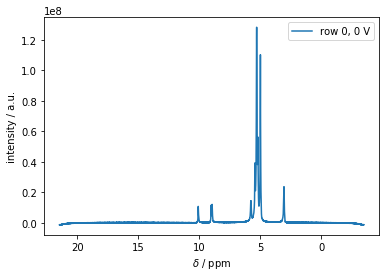

In [3]:
m = eNMR_Measurement('example data/example_data_1H/', 2)
m.proc(linebroadening=0.3, phc0=-190, phc1=360)
spec_1d = m.plot_spec(0, figsize=(6,4))

## calibration of x-axis
the chemical shift axis can be shifted by simply adding a random value until the wanted chemical shift is achieved

In [4]:
m.ppm += 0 #put some float here

<div id='datarange'/>

## specify data range
- specify the part of the spectrum you want to investigate

xmin: 7
xmax: 11
xmin: 6891
xmax: 9513
[-3.50885319 -3.50732811 -3.50580303 ... 21.47346984 21.47499492
 21.47652   ]


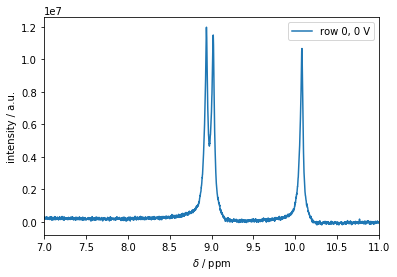

In [5]:
m.set_spectral_region(7, 11)
spec_fig = m.plot_spec(0, xlim=(11,7))

<div id='phasecorrection'/>

# Quick and Dirty Phase Analysis via Phasecorrection
- Linear robust Huber regression
    - works like the least-squares principle but with the threshold epsilon which finds outliers and eliminates them from the regression. This is visualized by red dots
        - $1\leq \varepsilon$
- .mobility() --> Determination of electrophoretic mobility and export of results

/opt/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


done, all went well
formula: y = [0.21327729]x + -12.333626359900022
1.22E-09 (m^2/Vs) +- 9.71E-11
1.22E-09 (m^2/Vs) +- 9.71E-11
the determined mobility from phase correction is: [1.22450273e-09] +- [9.70612221e-11]


/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


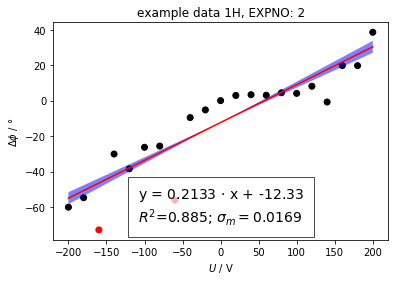

In [6]:
m.autophase()
m.lin_huber(epsilon=2)
lin_fig = m.lin_display()
print('the determined mobility from phase correction is:', m.mobility()[0],'+-', m.mobility()[1])

# eNMRraw data frame
- pandas DataFrame(), where all the phase information, voltage information etc. is saved and organized. This DataFrame will be called .dataset in the future
- for indexing tutorials please visit the pandas documentation page:
<a href='https://pandas.pydata.org/pandas-docs/stable/indexing.html'>klick here</a>
- the table can be exported to an excel file by **m.eNMRraw.to_excel(path)**
- the eNMRraw data frame can be accessed by either subscripting the dataframe itself **m.eNMRraw[key]** or for single colums the measurement object itsel **m[key]**

In [7]:
m.eNMRraw

,vc,U / [V],ph0,g in T/m,ph0acme,ph0acmereduced,outlier
19,19,-200.0,0.0,5.0,-60.052313,-3.447822e-07,False
17,17,-180.0,0.0,5.0,-54.726375,-3.142041e-07,False
15,15,-160.0,0.0,5.0,-72.868938,-4.183672e-07,True
13,13,-140.0,0.0,5.0,-30.098188,-1.728047e-07,False
11,11,-120.0,0.0,5.0,-38.436063,-2.206755e-07,False
9,9,-100.0,0.0,5.0,-26.293875,-1.509627e-07,False
7,7,-80.0,0.0,5.0,-25.617375,-1.470787e-07,False
5,5,-60.0,0.0,5.0,-56.093750,-3.220547e-07,True
3,3,-40.0,0.0,5.0,-9.549250,-5.482573e-08,False
1,1,-20.0,0.0,5.0,-5.220938,-2.997531e-08,False


# Fitting
## Lorentz Peak Fitting
- create Fitobject from SpecModel-class and define how many Lorentz distributions one wants to obtain
    - during the creation of the object, a function is generated consisting of the amount of lorentz peaks one wants to fit and the corresponding set of parameters and fit Model from the lmfit package is generated.
    - the parameters are stored under .params as a dictionary and can be displayed via .params.pretty_print()
    - for technical reasons, all parameters are initialized with 1

In [8]:
spec = SpecModel(3)
spec.params.pretty_print()

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0           1e+06        0      inf     None     True     None     None
a1           1e+06        0      inf     None     True     None     None
a2           1e+06        0      inf     None     True     None     None
baseline         1     -inf      inf     None     True     None     None
l0            0.01        0      inf     None     True     None     None
l1            0.01        0      inf     None     True     None     None
l2            0.01        0      inf     None     True     None     None
ph0              1     -180      180     None     True     None     None
ph1              1     -180      180     None     True     None     None
ph2              1     -180      180     None     True     None     None
v0               1     -inf      inf     None     True     None     None
v1               1     -inf      inf     None     True     None     None
v2               1     -inf      inf     None    

### initialize parameters and set constraints
- in order to initialize the parameters one can use .set_initial_values() by passing either single values or a list of values
- in addition, one can add mathematical contraints by simply typing the logic separated via = without any blank space
- the boundaries can
- calling the parameters again with .params.pretty_print() shows the changed parameter properties

In [9]:
spec.set_initial_values(['a0', 'a1'], [2e5, 2e5])
spec.set_initial_values(['v0', 'v1', 'v2'], [10.1, 9.0, 8.95])
spec.set_initial_values(['l0', 'l1', 'l2'], [0.02, 0.02, 0.02])
spec.set_mathematical_constraints(['a2=a1', 'ph2=ph1'])
spec.set_boundaries('a0',0,np.inf)
spec.set_boundaries('ph0', -180, 180)
spec.set_boundaries('ph1', -180, 180)
spec.params.pretty_print()

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0           2e+05        0      inf     None     True     None     None
a1           2e+05        0      inf     None     True     None     None
a2           2e+05        0      inf     None    False       a1     None
baseline         1     -inf      inf     None     True     None     None
l0            0.02        0      inf     None     True     None     None
l1            0.02        0      inf     None     True     None     None
l2            0.02        0      inf     None     True     None     None
ph0              1     -180      180     None     True     None     None
ph1              1     -180      180     None     True     None     None
ph2              1     -180      180     None    False      ph1     None
v0            10.1     -inf      inf     None     True     None     None
v1               9     -inf      inf     None     True     None     None
v2            8.95     -inf      inf     None    

### Plotting the start spectrum
- The start parameters and their influence on the start spectrum can be plotted as follows:
- the 1D spectrum **spec_fig** plotted from the originial Measurement object after the data range-selection can be passed to the method for a better comparison

/opt/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


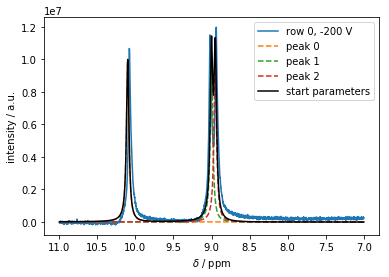

In [10]:
spec_fig = m.plot_spec(0)
start_spec_fig = spec.plot_init_spec(m.ppm, fig=spec_fig)

### fitting the spectrum
- the function **fit_Measurement()** takes the measurement object and the SpecModel object and fits all spectra of m listing the results in **m.eNMRraw**

In [11]:
fit_Measurement(m, spec, plot=False)
m.eNMRraw

start fitting
fitting finished


,vc,U / [V],ph0,g in T/m,ph0acme,ph0acmereduced,outlier,baseline,baseline_err,v0,...,a1,a1_err,v2,v2_err,l2,l2_err,ph2,ph2_err,a2,a2_err
19,19,-200.0,-78.243835,5.0,-60.052313,-3.447822e-07,False,-628098.336156,15888.038555,10.091421,...,126079.969284,2930.946952,8.948089,0.002983,0.051524,0.002954,-71.726873,1.359744,126079.969284,2930.946951
17,17,-180.0,-27.948157,5.0,-54.726375,-3.142041e-07,False,182016.422233,NaN,4.530204,...,112872.713930,NaN,9.013011,NaN,0.029033,NaN,-41.442692,NaN,112872.713930,NaN
15,15,-160.0,-23.468557,5.0,-72.868938,-4.183672e-07,True,270309.890531,73495.953534,4.569833,...,129515.751350,1481.351446,8.937948,0.000541,0.023694,0.000541,-37.694239,0.658585,129515.751350,1481.351447
13,13,-140.0,-21.813581,5.0,-30.098188,-1.728047e-07,False,309388.691914,176907.279744,4.570211,...,139405.515246,1660.867338,8.938552,0.000487,0.021410,0.000491,-35.561240,0.667379,139405.515246,1660.867343
11,11,-120.0,-20.235721,5.0,-38.436063,-2.206755e-07,False,342681.234079,50666.506296,4.625671,...,151775.572117,1750.201329,8.938326,0.000482,0.021266,0.000482,-31.948867,0.665937,151775.572117,1750.201330
9,9,-100.0,-57.785479,5.0,-26.293875,-1.509627e-07,False,-380000.334144,32095.414713,10.090772,...,193324.995501,4495.487496,8.945323,0.001397,0.028288,0.001394,-44.988224,1.324446,193324.995501,4495.487487
7,7,-80.0,-54.369562,5.0,-25.617375,-1.470787e-07,False,-331594.810964,33883.682023,10.090180,...,199552.608127,4674.871868,8.945278,0.001325,0.026942,0.001324,-41.863468,1.331708,199552.608127,4674.871874
5,5,-60.0,-51.486548,5.0,-56.093750,-3.220547e-07,True,-239956.587757,35506.091616,10.089945,...,205593.126229,4823.404466,8.945376,0.001270,0.025946,0.001270,-38.957744,1.331334,205593.126229,4823.404460
3,3,-40.0,-46.903592,5.0,-9.549250,-5.482573e-08,False,-134944.462913,38415.708883,10.090133,...,214608.608873,5191.040193,8.945393,0.001278,0.025460,0.001279,-34.012727,1.368091,214608.608873,5191.040182
1,1,-20.0,-42.671600,5.0,-5.220938,-2.997531e-08,False,24289.484291,40247.781820,10.090001,...,218070.792428,5388.137619,8.945477,0.001256,0.024675,0.001258,-29.491382,1.394060,218070.792428,5388.137608


### plotting the fit results
- after performing m.lin_huber() on the determined phase values, one can easily compare the data with m.lin_results_display()

/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


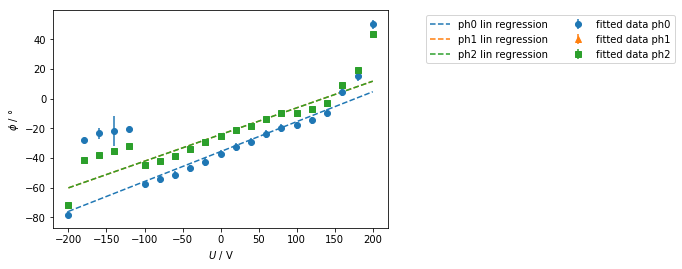

In [12]:
m.lin_huber(y_column='ph0')
m.lin_huber(y_column='ph1')
m.lin_huber(y_column='ph2')
compare_fig = m.lin_results_display(['ph0', 'ph1', 'ph2'], normalize=False)

# Mobility Ordered SpectroscopY (MOSY)
- based on 2D FFT with States-Haberkorn method applied.
- needs voltage dependend Measurement with equally negative and positive voltages.

In [13]:
mosy = MOSY(m)
mosy.calc_MOSY()
# mosy.export_data('test')

/home/florians/Sciebo/Python/NMR Projects/eNMRpkg/GitHub-Version/eNMR.py:1702: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  self.eNMRraw.set_value(row, 'data', pd.Series(obj.data[row,:]))


zero filling started!
(11, 2622) (4096, 2622)
zero filling finished!
done


/opt/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/anaconda/lib/python3.6/site-packages/matplotlib/transforms.py:954: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


(744785.1363930425+298073.16386866535j) (170070818.3287443-314737.2054258962j) (169326033.19235125-612810.3692945616j)


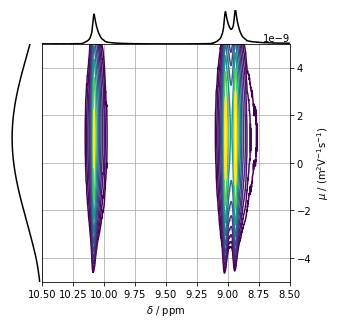

In [14]:
import numpy as np
# %matplotlib
mosy_fig = mosy.plot_MOSY(xlim=(10.5,8.5), ylim=(-5e-9,5e-9), levels=1e7*1.3**np.linspace(0,10,10))

## Display of MOSY slices

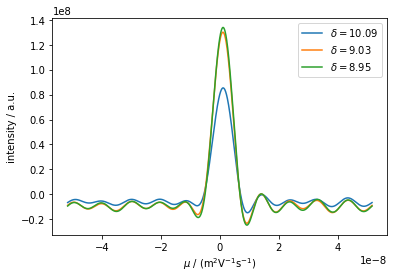

In [15]:
fig_slices = mosy.plot_slices_F1(m.eNMRraw.loc[0,['v0', 'v1', 'v2']])

/opt/anaconda/lib/python3.6/site-packages/matplotlib/text.py:1787: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


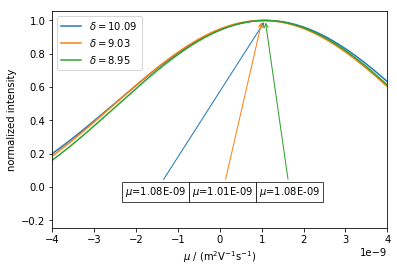

In [16]:
fig_slices = mosy.plot_slices_F1(m.eNMRraw.loc[0,['v0', 'v1', 'v2']], normalize=True, xlim=(-4e-9, 4e-9), annotate=True)